In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
drug_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_drug_data = pd.merge(mouse_data, drug_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_drug_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean = mouse_drug_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_mean = tumor_mean.reset_index()
tumor_mean_df = pd.DataFrame(tumor_mean)
tumor_mean = tumor_mean.reset_index()

# Preview DataFrame
tumor_mean_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = mouse_drug_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrameDrg
standard_error = standard_error.reset_index()
standard_error_df = pd.DataFrame(standard_error)


# Preview DataFrame
standard_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames

#tumor_mean_df = tumor_mean_df.reset_index()
tumor_mean_df_pivot = tumor_mean_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

#sem
#standard_error = standard_error.reset_index()
standard_error_pivot = standard_error_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_mean_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
#sem preview
standard_error_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


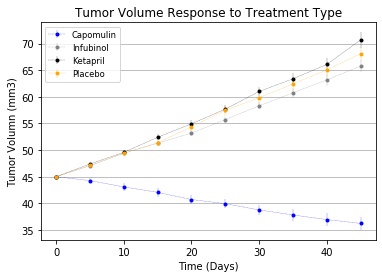

In [6]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_mean_df_pivot.index, tumor_mean_df_pivot["Capomulin"], yerr=standard_error_pivot["Capomulin"], 
             color="b", marker="o", markersize=3, linestyle="dashed", linewidth=.25)
plt.errorbar(tumor_mean_df_pivot.index, tumor_mean_df_pivot["Infubinol"], yerr=standard_error_pivot["Infubinol"], 
             color="gray", marker="o", markersize=3, linestyle="dashed", linewidth=.25)
plt.errorbar(tumor_mean_df_pivot.index, tumor_mean_df_pivot["Ketapril"], yerr=standard_error_pivot["Ketapril"], 
             color="black", marker="o", markersize=3, linestyle="dashed", linewidth=.25)
plt.errorbar(tumor_mean_df_pivot.index, tumor_mean_df_pivot["Placebo"], yerr=standard_error_pivot["Placebo"], 
             color="orange", marker="o", markersize=3, linestyle="dashed", linewidth=.25)


# Save the Figure
plt.title("Tumor Volume Response to Treatment Type")
plt.ylabel("Tumor Volumn (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis="y")
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="best", fontsize="small", fancybox=True)

In [7]:
# Show the Figure
plt.show()
mouse_drug_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site_mean = mouse_drug_data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
met_site_mean = met_site_mean.reset_index()
met_site_mean = pd.DataFrame(met_site_mean)
# Preview DataFrame
met_site_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site_sem = mouse_drug_data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
met_site_sem = met_site_sem.reset_index()
met_site_sem = pd.DataFrame(met_site_sem)

# Preview DataFrame
met_site_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames

#metastatic mean
met_site_mean = met_site_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

#metastatic sem
met_site_sem = met_site_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
met_site_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [11]:
#metastatic mean preview
met_site_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


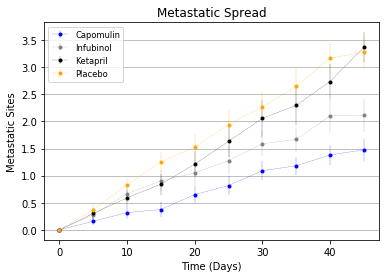

In [12]:
# Generate the Plot (with Error Bars)
plt.errorbar(met_site_mean.index, met_site_mean["Capomulin"], yerr=met_site_sem["Capomulin"], 
             color="b", marker="o", markersize=3, linestyle="dashed", linewidth=.25)
plt.errorbar(met_site_mean.index, met_site_mean["Infubinol"], yerr=met_site_sem["Infubinol"], 
             color="gray", marker="o", markersize=3, linestyle="dashed", linewidth=.25)
plt.errorbar(met_site_mean.index, met_site_mean["Ketapril"], yerr=met_site_sem["Ketapril"], 
             color="black", marker="o", markersize=3, linestyle="dashed", linewidth=.25)
plt.errorbar(met_site_mean.index, met_site_mean["Placebo"], yerr=met_site_sem["Placebo"], 
             color="orange", marker="o", markersize=3, linestyle="dashed", linewidth=.25)

# Save the Figure
plt.title("Metastatic Spread")
plt.ylabel("Metastatic Sites")
plt.xlabel("Time (Days)")
plt.grid(axis="y")
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="best", fontsize="small", fancybox=True)

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = mouse_drug_data.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]

# Convert to DataFrame
mice_count_df = pd.DataFrame({"Mice Count": mice_count})

# Preview DataFrame
mice_count_df = mice_count_df.reset_index()

In [14]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_df = mice_count_df.pivot(index="Timepoint", columns="Drug")["Mice Count"]

# Preview the Data Frame
mice_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


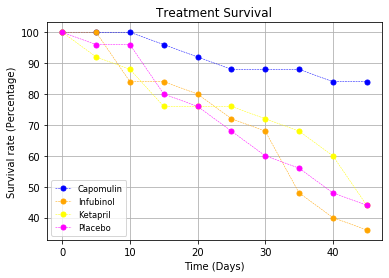

In [15]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 *  mice_count_df["Capomulin"] / 25, color="b", marker="o", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 *  mice_count_df["Infubinol"] / 25, color="orange", marker="o", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 *  mice_count_df["Ketapril"] / 25, color="yellow", marker="o", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 *  mice_count_df["Placebo"] / 25, color="magenta", marker="o", linestyle="dashed", markersize=5, linewidth=0.50)



# Save the Figure
plt.title("Treatment Survival")
plt.ylabel("Survival rate (Percentage)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="best", fontsize="small", fancybox=True)
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [39]:
# Calculate the percent changes for each drug
#tumor_mean_df 
#tumor_mean_df 
mean_percent_change = 100 * (tumor_mean_df_pivot.iloc[-1] - tumor_mean_df_pivot.iloc[0]) / tumor_mean_df_pivot.iloc[0]
sem_percent_change = 100 * (standard_error_pivot.iloc[-1] - standard_error_pivot.iloc[0]) / standard_error_pivot.iloc[0]
# Display the data to confirm


sem_percent_change.head()


Drug
Capomulin    inf
Ceftamin     inf
Infubinol    inf
Ketapril     inf
Naftisol     inf
dtype: float64

In [40]:
#percent change averages
mean_percent_change.head()

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
dtype: float64

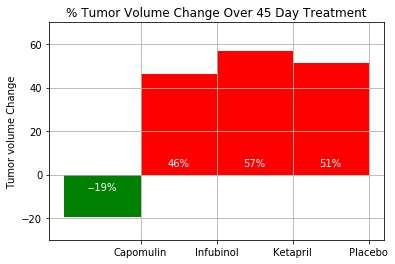

In [42]:
# Store all Relevant Percent Changes into a Tuple
percent_changes = (mean_percent_change["Capomulin"],
                  mean_percent_change["Infubinol"],
                  mean_percent_change["Ketapril"],
                  mean_percent_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange (len(percent_changes))
width = 1
rectsPass = ax.bar(ind[0], percent_changes[0], width, color="green")
rectsFail = ax.bar(ind[1:], percent_changes[1:], width, color="red")


# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel("Tumor volume Change")
ax.set_title("% Tumor Volume Change Over 45 Day Treatment")
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo"))
ax.set_autoscaley_on(False)
ax.set_ylim([-30, 70])
ax.grid(True)
                  
# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2. , 3, '%d%%' % int(height),
                ha='center', va='bottom', color='white')

# Call functions to implement the function calls
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2. , -8, '-%d%%' % int(height),
                ha='center', va='bottom', color='white')


# Save the Figure
autolabelPass(rectsPass)
autolabelFail(rectsFail)
# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)